# **Image Classification with the MNIST Dataset**

Author: ML7

In [114]:
from tensorflow.keras.datasets import mnist

In [115]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [116]:
x_train.shape

(60000, 28, 28)

In [117]:
x_valid.shape

(10000, 28, 28)

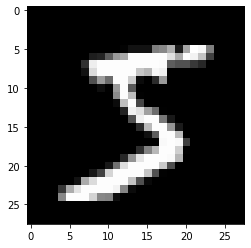

In [118]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [119]:
y_train[0]

5

In [120]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [121]:
x_train.shape

(60000, 784)

In [122]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [123]:
x_train = x_train / 255
x_valid = x_valid / 255

In [124]:
x_train.min()

0.0

In [125]:
x_train.max()

1.0

In [126]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [127]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [128]:
from tensorflow.keras.layers import Dense

In [129]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [130]:
model.add(Dense(units = 512, activation='relu'))

In [131]:
model.add(Dense(units = 10, activation='softmax'))

In [132]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
history = model.fit(
    x_train, y_train, epochs = 5, verbose = 1, validation_data = (x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1906 - accuracy: 0.9444 - val_loss: 0.1040 - val_accuracy: 0.9715
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1024 - accuracy: 0.9735 - val_loss: 0.1172 - val_accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0840 - accuracy: 0.9794 - val_loss: 0.1068 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9831 - val_loss: 0.1349 - val_accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9862 - val_loss: 0.1330 - val_accuracy: 0.9781


In [135]:
history = model.history
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = history.epoch

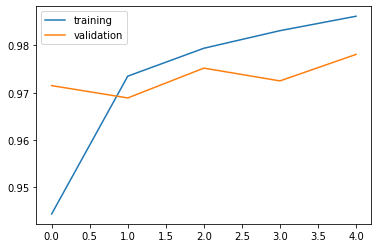

In [136]:
plt.plot(epochs, accuracy)
plt.plot(epochs, validation_accuracy)
labels = ['training', 'validation']
plt.legend(labels)

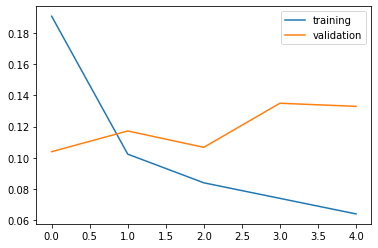

In [137]:
plt.plot(epochs, loss)
plt.plot(epochs, validation_loss)
labels = ['training', 'validation']
plt.legend(labels)